In [ ]:
# Connect with google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import package and database_file read
import pandas as pd
import numpy as np

data = pd.read_csv("/content/drive/MyDrive/ml dataset/diabetic_data.csv")
data

<ipython-input-6-5c92fa7260a6>:5: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/drive/MyDrive/ml dataset/diabetic_data.csv")


,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,MC,NaN,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,MC,NaN,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,Caucasian,Male,[70-80),NaN,1,1,7,1,MC,NaN,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,Caucasian,Female,[80-90),NaN,2,3,7,10,MC,Surgery-General,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [ ]:

# Check for missing values
print(data.isnull().sum())


race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide     

In [ ]:
df = data.copy()
df.head()


,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [ ]:
# df = df.dropna(subset='weight', how='all')
# df = df.dropna(subset='payer_code', how='all')
# df = df.dropna(subset='medical_specialty', how='all')
# df = df.dropna(subset='max_glu_serum', how='all')
# df = df.dropna(subset='A1Cresult', how='all')

In [ ]:
# Drop rows where 'diag_1', 'diag_2', or 'diag_3' are missing
df = df.dropna(subset=['diag_1', 'diag_2', 'diag_3'], how='any')


In [ ]:
# Drop columns with excessive missing values
df = df.drop(['weight', 'payer_code', 'medical_specialty', 'max_glu_serum', 'A1Cresult'], axis=1)


In [ ]:
df.isnull().sum()

,0
race,2191
gender,0
age,0
admission_type_id,0
discharge_disposition_id,0
admission_source_id,0
time_in_hospital,0
num_lab_procedures,0
num_procedures,0
num_medications,0


In [ ]:
race_missing_value =df[df['race'].isnull()].index.tolist()

In [ ]:
race_missing_value

[19,
 20,
 21,
 54,
 65,
 87,
 99,
 111,
 127,
 177,
 183,
 207,
 238,
 407,
 442,
 480,
 522,
 546,
 580,
 643,
 645,
 652,
 664,
 721,
 732,
 742,
 813,
 836,
 912,
 927,
 1008,
 1012,
 1108,
 1111,
 1189,
 1244,
 1295,
 1478,
 1510,
 1537,
 1614,
 1709,
 1768,
 1780,
 1881,
 1928,
 1967,
 2042,
 2053,
 2160,
 2334,
 2361,
 2402,
 2404,
 2462,
 2517,
 2534,
 2674,
 2774,
 2972,
 3021,
 3038,
 3063,
 3090,
 3105,
 3120,
 3192,
 3231,
 3249,
 3258,
 3270,
 3362,
 3420,
 3525,
 3605,
 3607,
 3688,
 3809,
 4126,
 4152,
 4174,
 4189,
 4199,
 4278,
 4306,
 4462,
 4503,
 4625,
 4656,
 4778,
 4792,
 4815,
 4847,
 4881,
 4950,
 4971,
 5039,
 5056,
 5093,
 5122,
 5164,
 5195,
 5275,
 5285,
 5407,
 5476,
 5579,
 5585,
 5628,
 5676,
 5697,
 5716,
 5732,
 5753,
 5774,
 5796,
 5904,
 5930,
 6322,
 6385,
 6401,
 6436,
 6497,
 6513,
 6642,
 6804,
 6855,
 6950,
 6987,
 7197,
 7265,
 7266,
 7292,
 7357,
 7391,
 7484,
 7641,
 7678,
 7711,
 7828,
 7848,
 7920,
 7933,
 7989,
 7994,
 8120,
 8241,
 8276,
 

In [ ]:
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np

# Ensure 'race' column has proper NaN values if not already
df['race'] = df['race'].replace('', np.nan)  # Replace empty strings with NaN if necessary

# Check if the column has any non-missing values
if df['race'].notna().any():
    # Initialize the SimpleImputer with the 'most_frequent' strategy
    imputer = SimpleImputer(strategy='most_frequent')

    # Apply the imputer to the 'race' column, reshaping to get a 1D array
    df['race'] = imputer.fit_transform(df[['race']]).ravel()
    # ravel() converts the 2D array output to a 1D array
    print("Imputation complete. Number of missing values in 'race':", df['race'].isnull().sum())
else:
    print("The 'race' column has no non-missing values. Cannot impute with the most frequent value.")


Imputation complete. Number of missing values in 'race': 0


In [ ]:
 # Check if the missing values at these indices are filled
print("Values after imputation at missing indices:")
print(df.loc[race_missing_value, 'race'])

# Confirm no missing values remain in the 'race' column
print("Number of missing values in 'race':", df['race'].isnull().sum())



Values after imputation at missing indices:
19        Caucasian
20        Caucasian
21        Caucasian
54        Caucasian
65        Caucasian
            ...    
101659    Caucasian
101671    Caucasian
101702    Caucasian
101715    Caucasian
101732    Caucasian
Name: race, Length: 2191, dtype: object
Number of missing values in 'race': 0


In [ ]:
# Check unique values in 'race' after imputation
print("Unique values in 'race':", df['race'].unique())

# View the counts for each value
print("Value counts for 'race':")
print(df['race'].value_counts())


Unique values in 'race': ['Caucasian' 'AfricanAmerican' 'Other' 'Asian' 'Hispanic']
Value counts for 'race':
race
Caucasian          77270
AfricanAmerican    18881
Hispanic            1984
Other               1484
Asian                625
Name: count, dtype: int64


In [ ]:
df.isnull().sum()

,0
race,0
gender,0
age,0
admission_type_id,0
discharge_disposition_id,0
admission_source_id,0
time_in_hospital,0
num_lab_procedures,0
num_procedures,0
num_medications,0


In [ ]:
df.shape

(100244, 43)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100244 entries, 1 to 101765
Data columns (total 43 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   race                      100244 non-null  object
 1   gender                    100244 non-null  object
 2   age                       100244 non-null  object
 3   admission_type_id         100244 non-null  int64 
 4   discharge_disposition_id  100244 non-null  int64 
 5   admission_source_id       100244 non-null  int64 
 6   time_in_hospital          100244 non-null  int64 
 7   num_lab_procedures        100244 non-null  int64 
 8   num_procedures            100244 non-null  int64 
 9   num_medications           100244 non-null  int64 
 10  number_outpatient         100244 non-null  int64 
 11  number_emergency          100244 non-null  int64 
 12  number_inpatient          100244 non-null  int64 
 13  diag_1                    100244 non-null  object
 14  diag_2   

In [ ]:
# We use to fill missing values for categorical columns with the mode.............
# Assuming 'df' is your DataFrame, replace 'data_cleaned' with 'df'
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

In [ ]:
# We use to fill missing values for categorical columns with the mode.............

# categorical_columns = data_cleaned.select_dtypes(include=['object']).columns
# data_cleaned[categorical_columns] = data_cleaned[categorical_columns].fillna(data_cleaned[categorical_columns].mode().iloc[0])

In [ ]:
df.isna().sum()

,0
race,0
gender,0
age,0
admission_type_id,0
discharge_disposition_id,0
admission_source_id,0
time_in_hospital,0
num_lab_procedures,0
num_procedures,0
num_medications,0


In [ ]:
  df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100244 entries, 1 to 101765
Data columns (total 43 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   race                      100244 non-null  object
 1   gender                    100244 non-null  object
 2   age                       100244 non-null  object
 3   admission_type_id         100244 non-null  int64 
 4   discharge_disposition_id  100244 non-null  int64 
 5   admission_source_id       100244 non-null  int64 
 6   time_in_hospital          100244 non-null  int64 
 7   num_lab_procedures        100244 non-null  int64 
 8   num_procedures            100244 non-null  int64 
 9   num_medications           100244 non-null  int64 
 10  number_outpatient         100244 non-null  int64 
 11  number_emergency          100244 non-null  int64 
 12  number_inpatient          100244 non-null  int64 
 13  diag_1                    100244 non-null  object
 14  diag_2   

In [ ]:
 df['race'].value_counts()

,count
race,
Caucasian,77270
AfricanAmerican,18881
Hispanic,1984
Other,1484
Asian,625


In [ ]:
df['gender'].value_counts()

,count
gender,
Female,53922
Male,46319
Unknown/Invalid,3


In [ ]:
df['age'].value_counts()

,count
age,
[70-80),25898
[60-70),22288
[80-90),17090
[50-60),17044
[40-50),9474
[30-40),3616
[90-100),2785
[20-30),1515
[10-20),469


In [ ]:
df['diag_1'].value_counts()

,count
diag_1,
428,6853
414,6546
786,3977
410,3610
486,3495
...,...
216,1
V43,1
838,1


In [ ]:
df['diag_2'].value_counts()

,count
diag_2,
428,6657
276,6622
250,5584
427,5022
401,3705
...,...
944,1
E919,1
E829,1


In [ ]:
df['diag_3'].value_counts()

,count
diag_3,
250,11533
401,8281
276,5172
428,4572
427,3949
...,...
E945,1
853,1
542,1


In [ ]:
df['metformin'].value_counts()

,count
metformin,
No,80543
Steady,18092
Up,1045
Down,564


In [ ]:
df['repaglinide'].value_counts()

,count
repaglinide,
No,98711
Steady,1380
Up,108
Down,45


In [ ]:
df['nateglinide'].value_counts()

,count
nateglinide,
No,99546
Steady,663
Up,24
Down,11


In [ ]:
df['chlorpropamide'].value_counts()

,count
chlorpropamide,
No,100160
Steady,77
Up,6
Down,1


In [ ]:
df['glimepiride'].value_counts()

,count
glimepiride,
No,95104
Steady,4627
Up,321
Down,192


In [ ]:
df['acetohexamide'].value_counts()

,count
acetohexamide,
No,100243
Steady,1


In [ ]:
df['glipizide'].value_counts()

,count
glipizide,
No,87682
Steady,11238
Up,767
Down,557


In [ ]:
df['glyburide'].value_counts()

,count
glyburide,
No,89719
Steady,9160
Up,809
Down,556


In [ ]:
df['tolbutamide'].value_counts()

,count
tolbutamide,
No,100221
Steady,23


In [ ]:
df['pioglitazone'].value_counts()

,count
pioglitazone,
No,92999
Steady,6898
Up,231
Down,116


In [ ]:
df['rosiglitazone'].value_counts()

,count
rosiglitazone,
No,93941
Steady,6039
Up,177
Down,87


In [ ]:
df['acarbose'].value_counts()

,count
acarbose,
No,99939
Steady,292
Up,10
Down,3


In [ ]:
df['miglitol'].value_counts()

,count
miglitol,
No,100207
Steady,31
Down,4
Up,2


In [ ]:
df['troglitazone'].value_counts()

,count
troglitazone,
No,100241
Steady,3


In [ ]:
df['tolazamide'].value_counts()

,count
tolazamide,
No,100207
Steady,36
Up,1


In [ ]:
df['examide'].value_counts()

,count
examide,
No,100244


In [ ]:
df['citoglipton'].value_counts()

,count
citoglipton,
No,100244


In [ ]:
df['insulin'].value_counts()

,count
insulin,
No,46802
Steady,30270
Down,12020
Up,11152


In [ ]:
df['glyburide-metformin'].value_counts()

,count
glyburide-metformin,
No,99549
Steady,681
Up,8
Down,6


In [ ]:
df['glipizide-metformin'].value_counts()

,count
glipizide-metformin,
No,100231
Steady,13


In [ ]:
df['glimepiride-pioglitazone'].value_counts()

,count
glimepiride-pioglitazone,
No,100243
Steady,1


In [ ]:
df['metformin-rosiglitazone'].value_counts()

,count
metformin-rosiglitazone,
No,100242
Steady,2


In [ ]:
df['metformin-pioglitazone'].value_counts()

,count
metformin-pioglitazone,
No,100243
Steady,1


In [ ]:
df['change'].value_counts()

,count
change,
No,53892
Ch,46352


In [ ]:
df['diabetesMed'].value_counts()

,count
diabetesMed,
Yes,77155
No,23089


In [ ]:
df['readmitted'].value_counts()

,count
readmitted,
NO,53821
>30,35173
<30,11250


In [ ]:
data_increased= pd.get_dummies(df,columns=['metformin-pioglitazone'],drop_first=True)

In [ ]:
data_increased= pd.get_dummies(df,columns=['metformin-rosiglitazone'],drop_first=True)

In [ ]:
data_increased= pd.get_dummies(df,columns=['glimepiride-pioglitazone'],drop_first=True)

In [ ]:
data_increased= pd.get_dummies(df,columns=['glipizide-metformin'],drop_first=True)

In [ ]:
data_increased= pd.get_dummies(df,columns=['tolazamide'],drop_first=True)

In [ ]:
data_increased= pd.get_dummies(df,columns=['glipizide-metformin'],drop_first=True)

In [ ]:
import pandas as pd
import numpy as np

#  DataFrame with mixed string + numeric columns
data = {'mixed_column': ['diag_1', 'diag_2', 'diag_3', 'readmitted']}
df = pd.DataFrame(data)

# Function to separate strings and numerics
def separate_string_and_numeric(value):
    # Extract numeric part
    numeric_part = ''.join(filter(str.isdigit, value))
    # Extract string part
    string_part = ''.join(filter(str.isalpha, value))
    return string_part, numeric_part

# Apply the function to the 'mixed_column' to separate strings and numerics
df[['string_part', 'numeric_part']] = df['mixed_column'].apply(lambda x: pd.Series(separate_string_and_numeric(x)))

# Convert the numeric part to integer (if applicable)
df['numeric_part'] = pd.to_numeric(df['numeric_part'], errors='coerce')  # Coerce invalid parsing to NaN

# Handling missing numeric values (impute with the mean for simplicity)
df['numeric_part'].fillna(df['numeric_part'].mean(), inplace=True)

# If there are unbalanced string categories, you can handle them as follows (example: encoding)
df['string_part'] = pd.factorize(df['string_part'])[0]  # Converts strings to numerical labels

# If you need to normalize or scale the numeric values:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['normalized_numeric_part'] = scaler.fit_transform(df[['numeric_part']])

# Display the transformed DataFrame
print(df)


  mixed_column  string_part  numeric_part  normalized_numeric_part
0       diag_1            0           1.0                -1.414214
1       diag_2            0           2.0                 0.000000
2       diag_3            0           3.0                 1.414214
3   readmitted            1           2.0                 0.000000


<ipython-input-71-2c0e91c4cecd>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['numeric_part'].fillna(df['numeric_part'].mean(), inplace=True)


In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Step 1: Define columns for Label Encoding and One-Hot Encoding
label_encode_cols = ['gender', 'age', 'change', 'diabetesMed', 'readmitted']  # Ordinal or Binary categories
one_hot_encode_cols = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
                       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide',
                       'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
                       'miglitol', 'troglitazone', 'tolazamide', 'examide',
                       'citoglipton', 'insulin', 'glyburide-metformin',
                       'glipizide-metformin', 'glimepiride-pioglitazone',
                       'metformin-rosiglitazone', 'metformin-pioglitazone']

# Step 2: Apply Label Encoding
label_encoder = LabelEncoder()
for col in label_encode_cols:
    df[col] = label_encoder.fit_transform(df[col]) # This line was not indented before, causing the error

# Step 3: Apply One-Hot Encoding
df = pd.get_dummies(df, columns=one_hot_encode_cols, drop_first=True)  # Avoid dummy variable trap

# Step 4: Check converted columns
print(df.info())


In [ ]:
diag_cols = ['diag_1', 'diag_2', 'diag_3']
for col in diag_cols:
    df[col] = label_encoder.fit_transform(df[col])


In [ ]:
print(df.shape)
print(df.head())


(4, 4)
  mixed_column  string_part  numeric_part  normalized_numeric_part
0       diag_1            0           1.0                -1.414214
1       diag_2            0           2.0                 0.000000
2       diag_3            0           3.0                 1.414214
3   readmitted            1           2.0                 0.000000


In [ ]:
df.isnull().sum()

,0
mixed_column,0
string_part,0
numeric_part,0
normalized_numeric_part,0


In [ ]:
df.shape


(4, 4)

In [ ]:
df.describe()


,string_part,numeric_part,normalized_numeric_part
count,4.00,4.000000,4.000000
mean,0.25,2.000000,0.000000
std,0.50,0.816497,1.154701
min,0.00,1.000000,-1.414214
25%,0.00,1.750000,-0.353553
50%,0.00,2.000000,0.000000
75%,0.25,2.250000,0.353553
max,1.00,3.000000,1.414214


Visualation

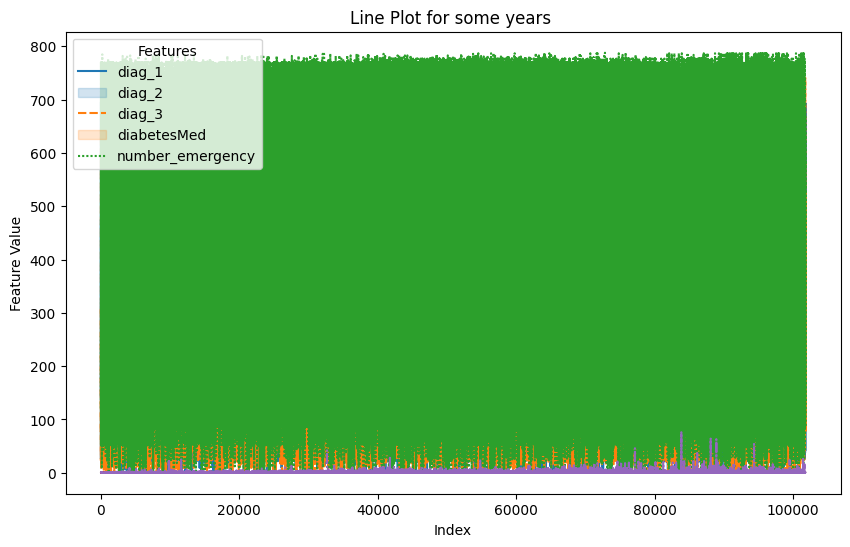

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Line Plot for Multiple Columns
plt.figure(figsize=(10, 6))

# Plotting multiple columns: Replace ['diag_1', 'diag_2', 'diag_3''number_emergency','diabetesMed'] with your actual columns
sns.lineplot(data=df[['diag_1', 'diag_2', 'diag_3', 'diabetesMed', 'number_emergency']])  # Adjust columns as needed

plt.title('Line Plot for some years ')
plt.xlabel('Index')
plt.ylabel('Feature Value')
plt.legend(title='Features', labels=['diag_1', 'diag_2', 'diag_3', 'diabetesMed', 'number_emergency'])  # Adjust labels as needed
plt.show()


**box plot **

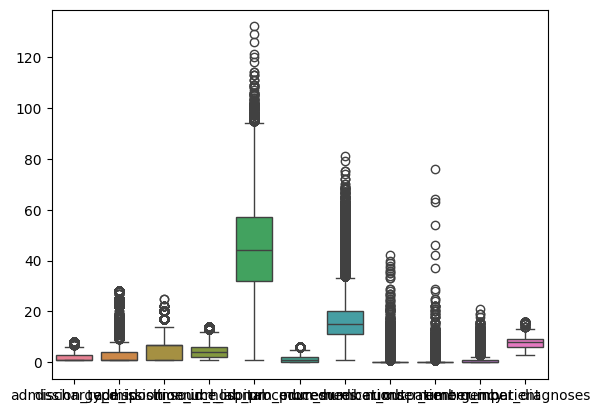

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df)
plt.show()

Scatter plot

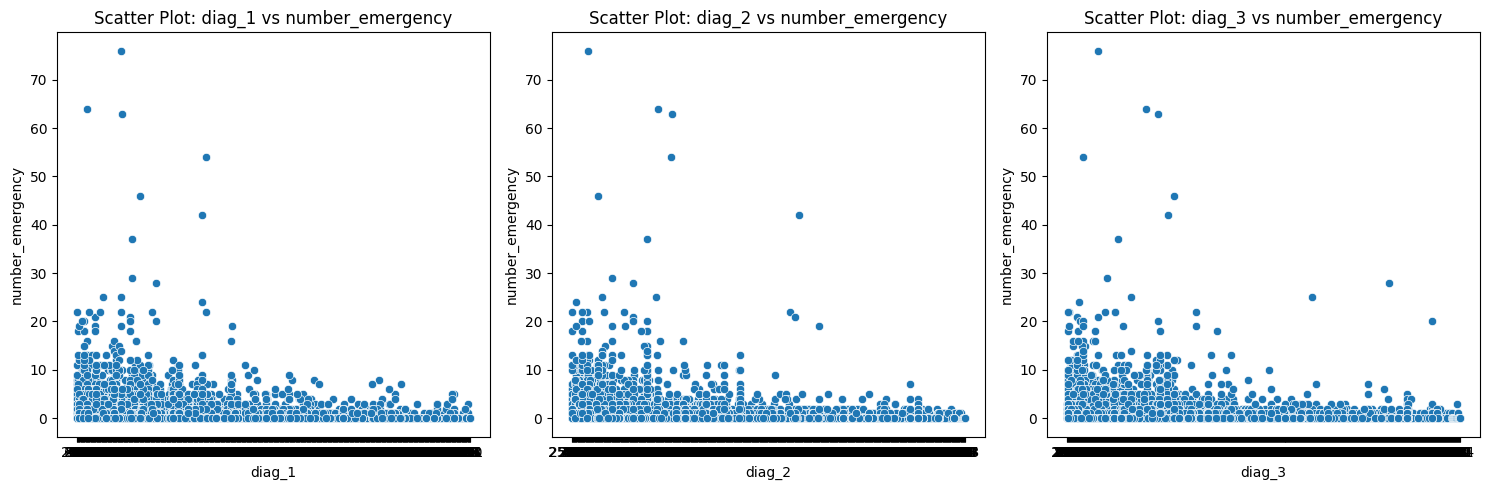

In [ ]:
import math

def show_multiple_scatter_plots(dataframe, feature_pairs):
    num_plots = len(feature_pairs)
    num_columns = 3
    num_rows = math.ceil(num_plots / num_columns)

    plt.figure(figsize=(num_columns * 5, num_rows * 5))

    for i, (feature_1, feature_2) in enumerate(feature_pairs, 1):
        plt.subplot(num_rows, num_columns, i)
        sns.scatterplot(x=dataframe[feature_1], y=dataframe[feature_2])
        plt.title(f'Scatter Plot: {feature_1} vs {feature_2}')
        plt.xlabel(feature_1)
        plt.ylabel(feature_2)

    plt.tight_layout()
    plt.show()

feature_pairs = [

    ('diag_1', 'number_emergency'),
    ('diag_2', 'number_emergency'),
    ('diag_3', 'number_emergency'),
    # ('F2010', 'F2022')
]

show_multiple_scatter_plots(df, feature_pairs)

Histogram

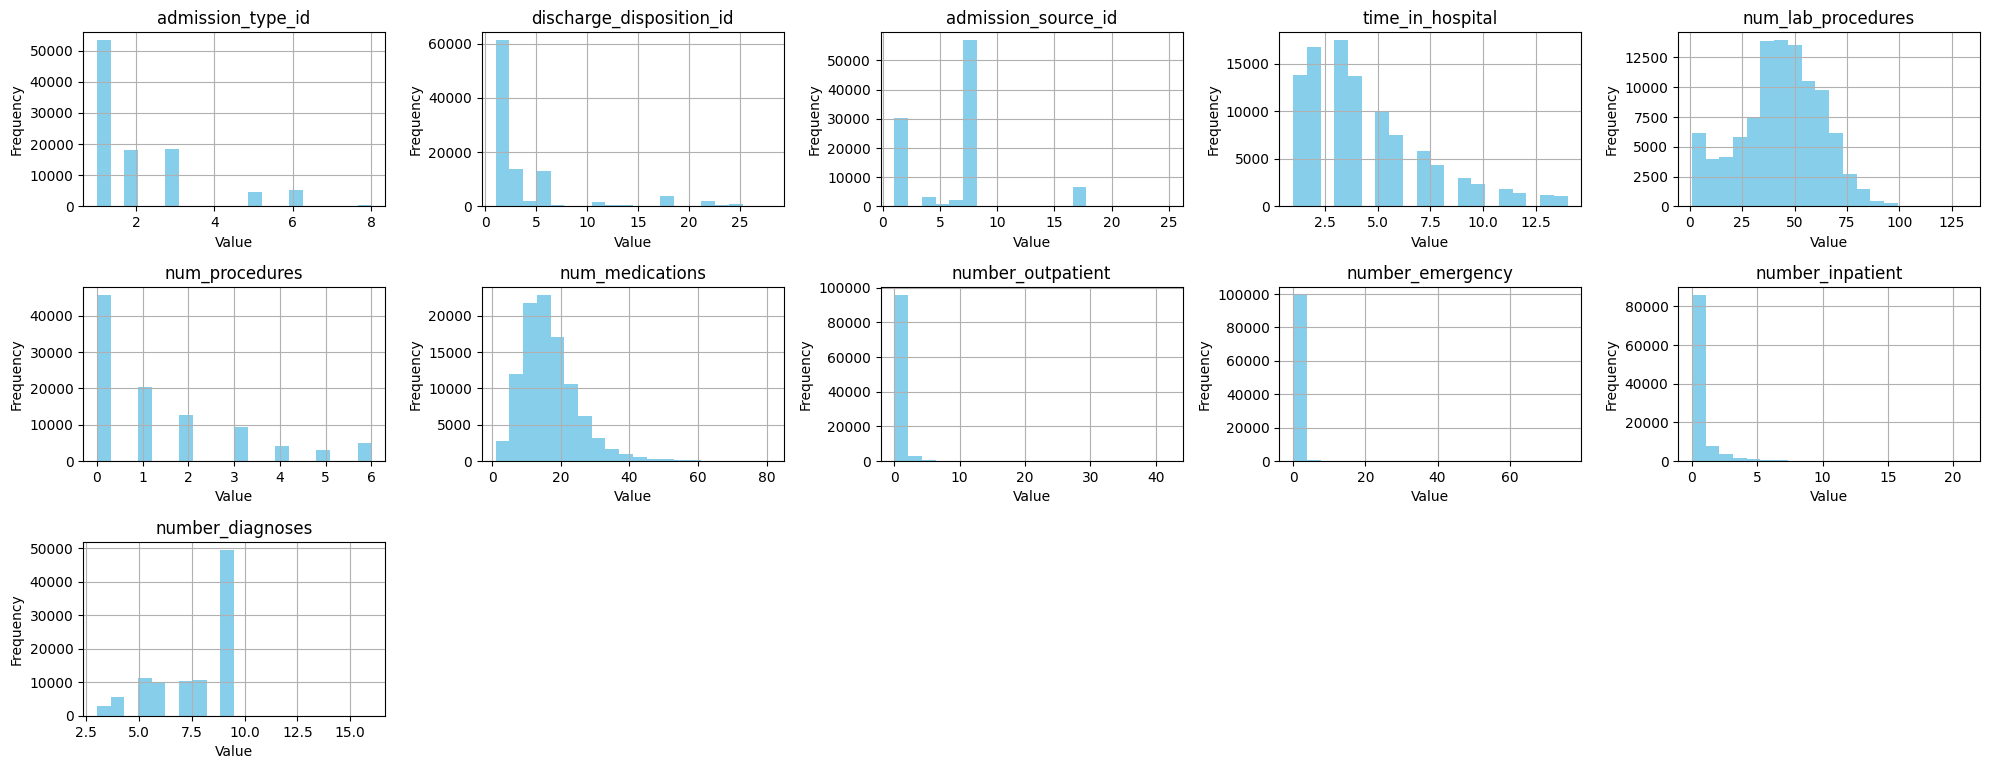

In [ ]:
def show_hist(dataframe):
    numerical_features = dataframe.select_dtypes(include=['int64', 'float64']).columns

    plt.figure(figsize=(20, 15))

    for i, feature in enumerate(numerical_features, 1):
        plt.subplot(6, 5, i)
        dataframe[feature].hist(bins=20, color='skyblue')
        plt.title(feature)
        plt.xlabel('Value')
        plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

show_hist(df)

In [ ]:
df.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'metformin', 'repaglinide',
       'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
       'examide', 'citoglipton', 'insulin', 'glyburide-metformin',
       'glipizide-metformin', 'glimepiride-pioglitazone',
       'metformin-rosiglitazone', 'metformin-pioglitazone', 'change',
       'diabetesMed', 'readmitted'],
      dtype='object')

In [ ]:
x = df.drop(columns=['tolazamide'])
y = df['tolazamide']
y

,tolazamide
1,No
2,No
3,No
4,No
5,No
...,...
101761,No
101762,No
101763,No
101764,No


Feature selection

**HEAT MAP**

Column 'glipizide' could not be converted to numeric. Encoding with LabelEncoder.


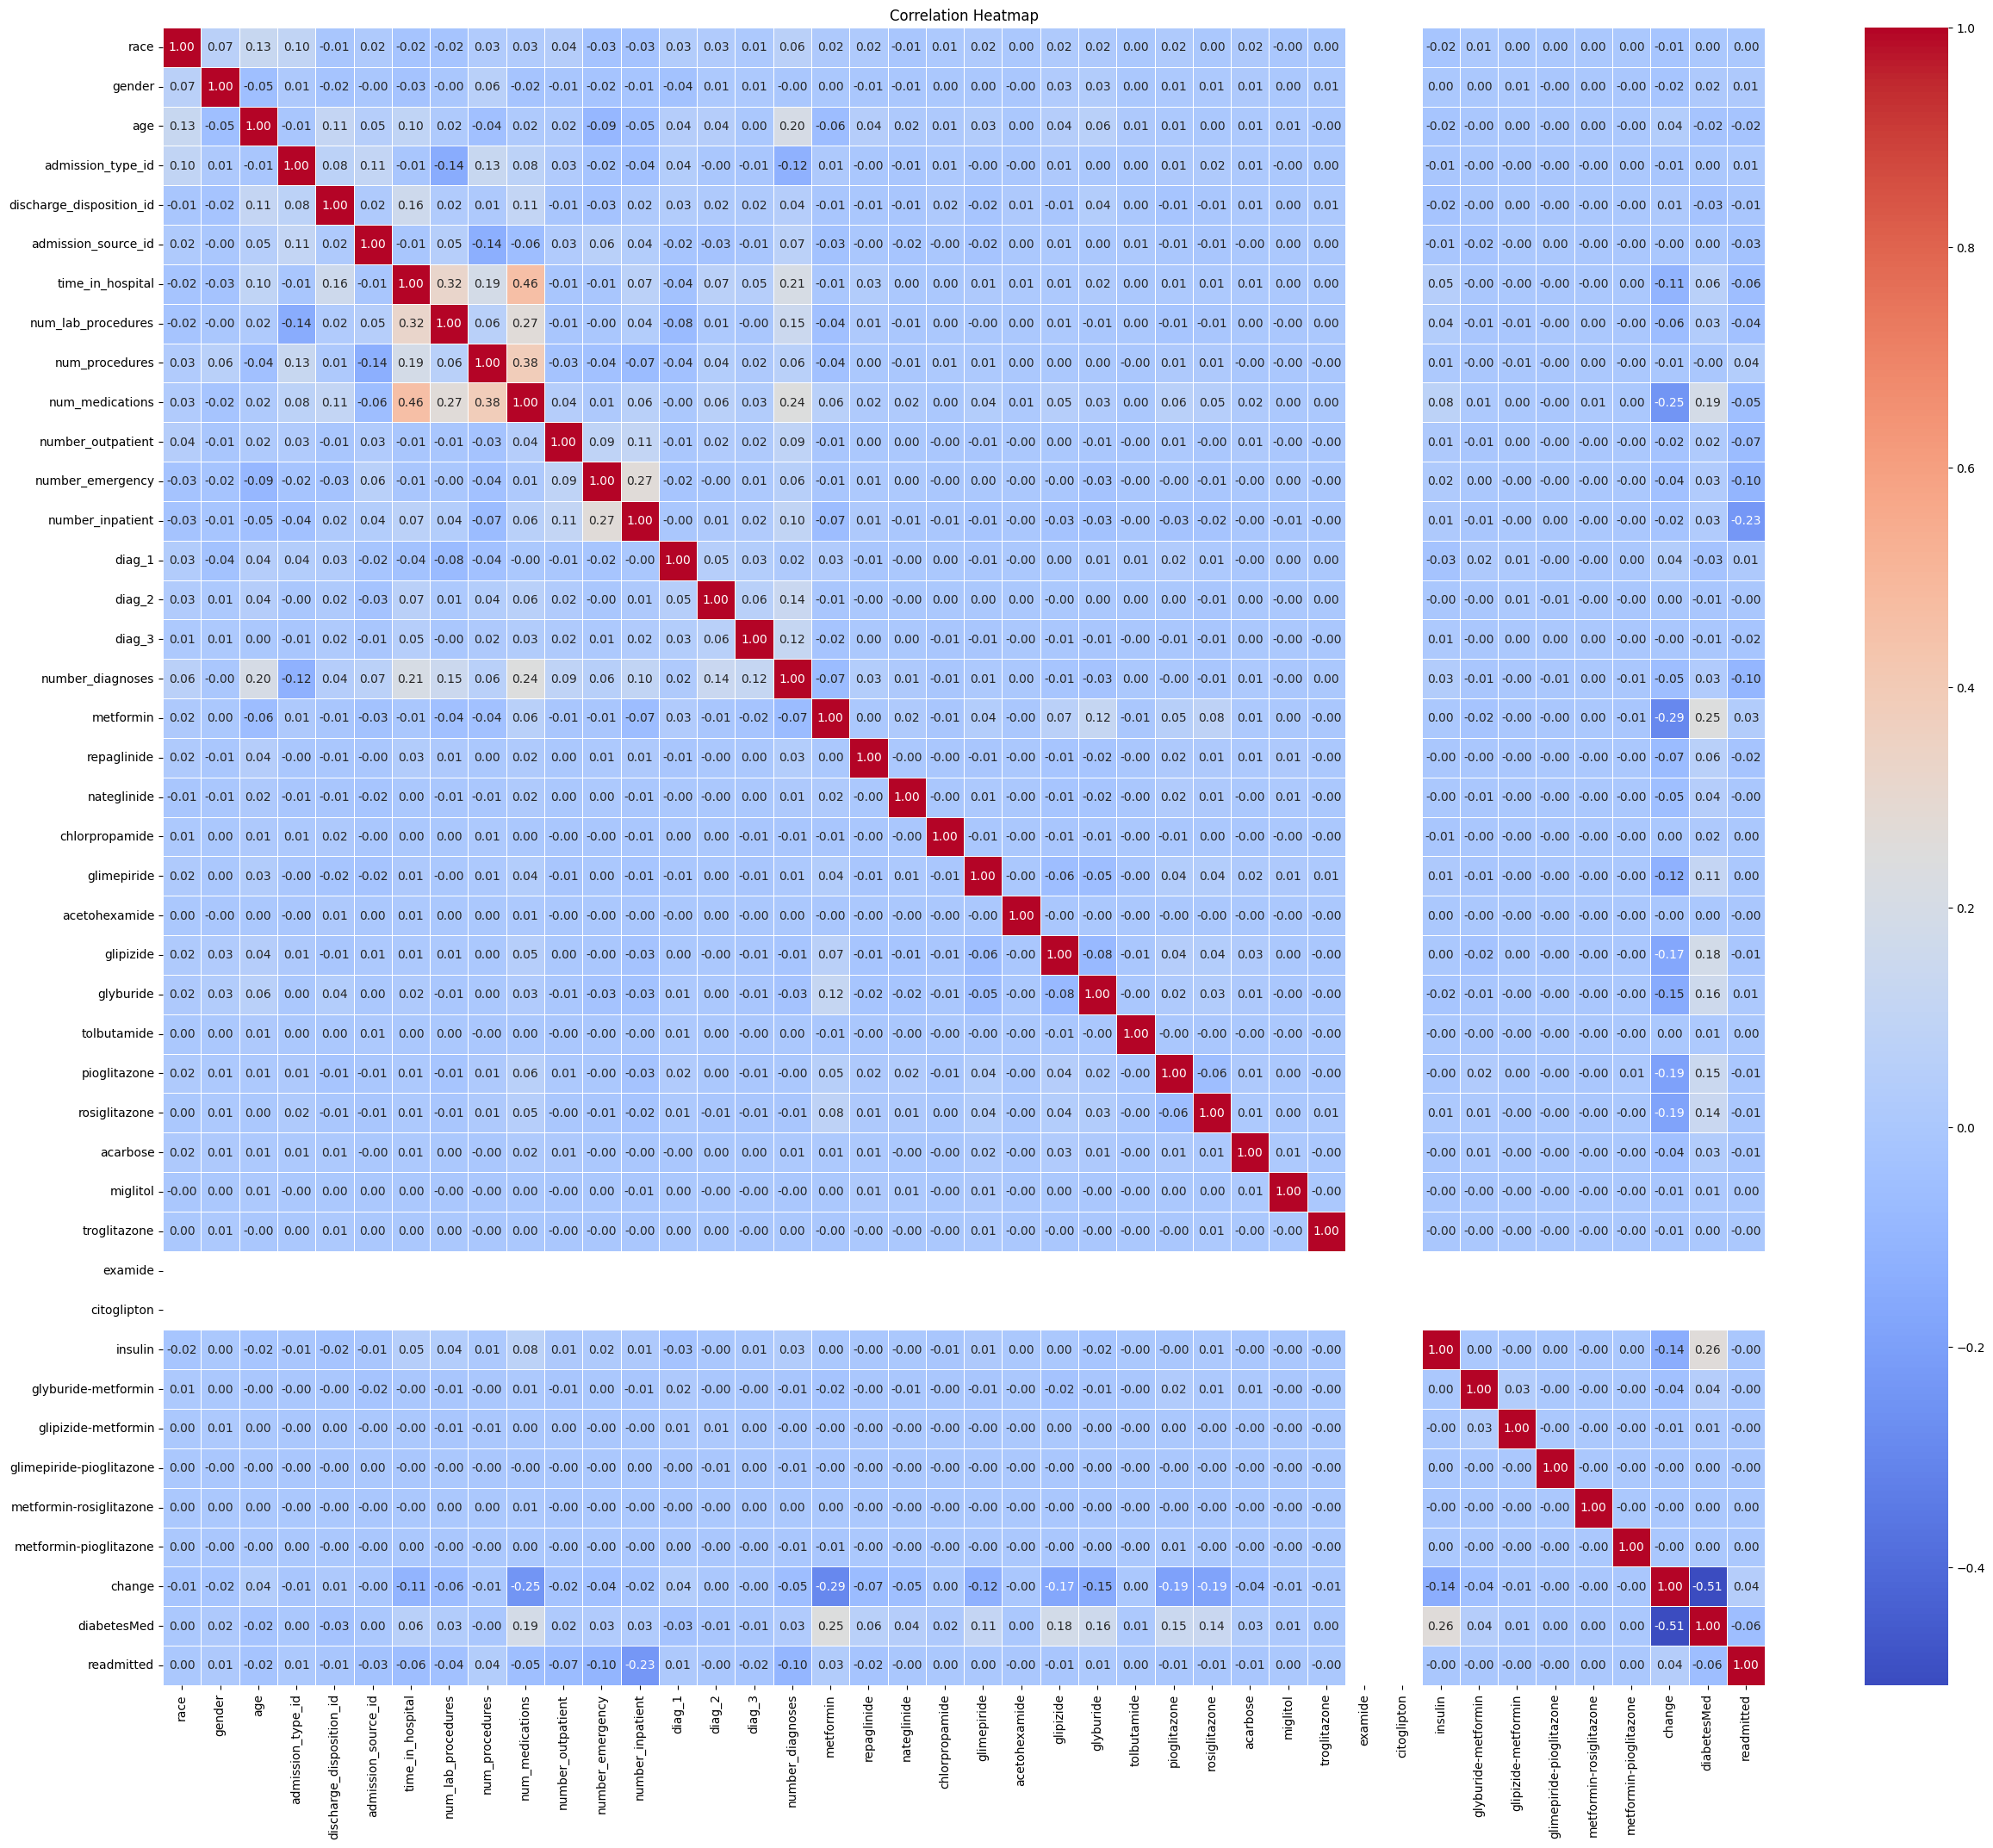

In [ ]:
# Before calculating correlation, convert relevant columns to numeric
for column in x.select_dtypes(include=['object']).columns:
    try:
        x[column] = pd.to_numeric(x[column])
    except ValueError:
        print(f"Column '{column}' could not be converted to numeric. Encoding with LabelEncoder.")
        from sklearn.preprocessing import LabelEncoder
        le = LabelEncoder()
        x[column] = le.fit_transform(x[column])

# Now calculate the correlation matrix
plt.figure(figsize=(30, 25))
correlation_matrix = x.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

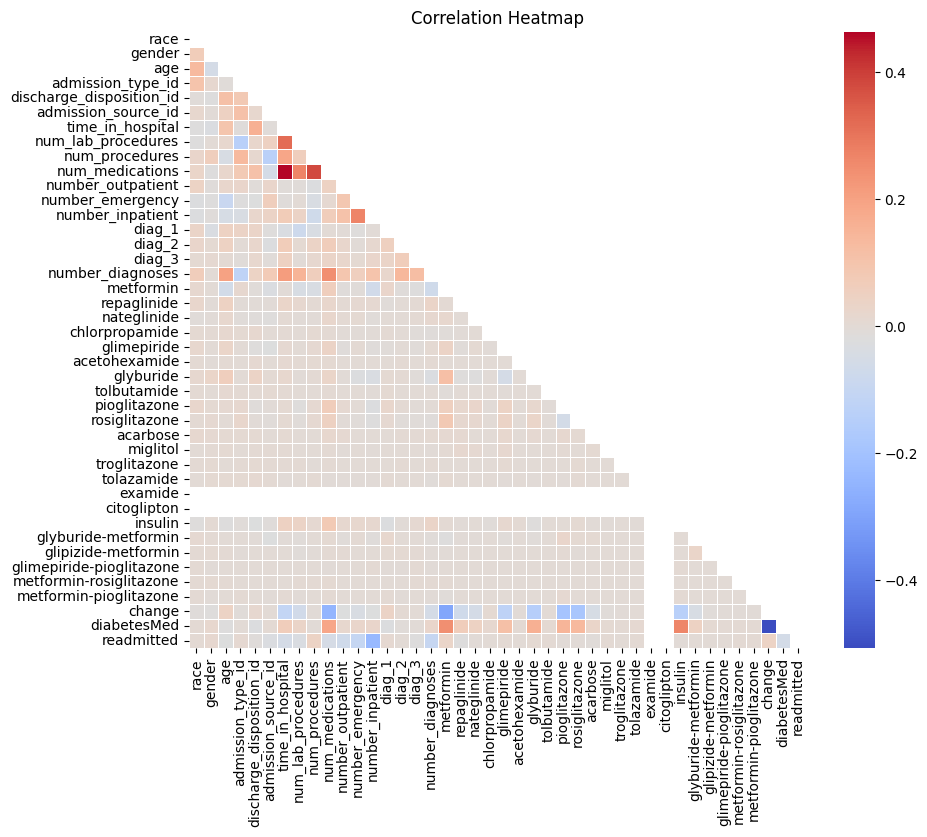

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd  # Import pandas for pd.to_numeric

def show_corr_heatmap(df, title):
    # Convert object columns to numeric using pd.to_numeric with errors='coerce'
    numeric_df = df.select_dtypes(include=np.number)
    # Select only numeric features
    corr = numeric_df.corr()
    # Calculate correlation for numeric features

    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True

    plt.figure(figsize=(10, 8))
    plt.title(title)
    sns.heatmap(corr, annot=False, linewidths=.5, square=True, mask=mask, cmap='coolwarm')

    plt.show()

# Assuming 'df' is the DataFrame you want to analyze
# (it's the DataFrame used in the previous code snippets)
show_corr_heatmap(df, 'Correlation Heatmap') # Call the function with 'df' instead of 'Processed_data'

**SPLIT TRANING AND TESTING**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
x_train.shape, x_test.shape

((80195, 42), (20049, 42))

**liNER REGGRESSION**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [ ]:
from sklearn.linear_model import LinearRegression
lin_rg = LinearRegression()
lin_rg.fit(x_train_scaled, y_train)
lrg_train_score=lin_rg.score(x_train_scaled, y_train)*100
lrg_train_score

0.08314748803475158

In [ ]:
lin_rg.fit(x_test_scaled, y_test)
lrg_test_score=lin_rg.score(x_test_scaled, y_test)*100
lrg_test_score

0.1951372943200691

**lOGISTIG REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression

lgrg = LogisticRegression()
lgrg.fit(x_train_scaled, y_train)
lgrg_train_score = lgrg.score(x_train_scaled, y_train) * 100
print(f"Training Accuracy: {lgrg_train_score:.2f}%")

Training Accuracy: 99.97%


In [ ]:
lgrg_test_score = lgrg.score(x_test_scaled, y_test) * 100
print(f"Test Accuracy: {lgrg_test_score:.2f}%")


Test Accuracy: 99.96%


**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

knnR= KNeighborsRegressor()
knnR.fit(x_train_scaled, y_train)
knnR_train_score = knnR.score(x_train_scaled, y_train)*100
knnR_train_score

23.845205464018182

In [ ]:
knnR.fit(x_test_scaled, y_test)
knnR_test_score = knnR.score(x_test_scaled, y_test)*100
knnR_test_score

25.2998003992016

**DECISSION TREE**

In [ ]:
from sklearn import tree

dtc = tree.DecisionTreeClassifier()
dtc.fit(x_train_scaled, y_train)
dtc_train_score = dtc.score(x_train_scaled, y_train)*100
dtc_train_score


100.0

In [ ]:
dtc_test_score = dtc.score(x_test_scaled, y_test)*100
dtc_test_score


99.88029328146042

**RANDOM FOREST CLASIFIER**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(x_train, y_train)

y_train_pred = rf_model.predict(x_train)
y_test_pred = rf_model.predict(x_test)

rf_train_accuracy = accuracy_score(y_train, y_train_pred) * 100
rf_test_accuracy = accuracy_score(y_test, y_test_pred) * 100

print(f"Random Forest Training Accuracy: {rf_train_accuracy:.2f}%")
print(f"Random Forest Test Accuracy: {rf_test_accuracy:.2f}%")



Random Forest Training Accuracy: 100.00%
Random Forest Test Accuracy: 99.96%


**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knnC = KNeighborsClassifier(n_neighbors=15)

knnC.fit(x_train, y_train)

y_train_pred = knnC.predict(x_train)
y_test_pred = knnC.predict(x_test)

knnC_train_score = accuracy_score(y_train, y_train_pred) * 100
knnC_test_score = accuracy_score(y_test, y_test_pred) * 100

print(f"KNN Classifier Training Accuracy: {knnC_train_score:.2f}%")
print(f"KNN Classifier Test Accuracy: {knnC_test_score:.2f}%")

KNN Classifier Training Accuracy: 99.97%
KNN Classifier Test Accuracy: 99.96%


**NAIVE BAYES**

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(x_train, y_train)

y_train_pred = gnb.predict(x_train)
y_test_pred = gnb.predict(x_test)

gnb_train_score = accuracy_score(y_train, y_train_pred) * 100
gnb_test_score = accuracy_score(y_test, y_test_pred) * 100

print(f"Gaussian Naive Bayes Training Accuracy: {gnb_train_score:.2f}%")
print(f"Gaussian Naive Bayes Test Accuracy: {gnb_test_score:.2f}%")


Gaussian Naive Bayes Training Accuracy: 50.13%
Gaussian Naive Bayes Test Accuracy: 50.81%


***GRADIENT BOOSTING***

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

gbm = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

gbm.fit(x_train, y_train)

y_train_pred = gbm.predict(x_train)
y_test_pred = gbm.predict(x_test)

gbm_train_score = r2_score(y_train, y_train_pred) * 100
gbm_test_score = r2_score(y_test, y_test_pred) * 100

print(f"Gradient Boosting Regressor Training R^2 Score: {gbm_train_score:.2f}%")
print(f"Gradient Boosting Regressor Test R^2 Score: {gbm_test_score:.2f}%")

Gradient Boosting Regressor Training R^2 Score: 1.86%
Gradient Boosting Regressor Test R^2 Score: 0.44%


**X-BOXTING**

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

xgb.fit(x_train, y_train)

y_train_pred = xgb.predict(x_train)
y_test_pred = xgb.predict(x_test)

xgb_train_score = r2_score(y_train, y_train_pred) * 100
xgb_test_score = r2_score(y_test, y_test_pred) * 100

print(f"XGBoost Regressor Training R^2 Score: {xgb_train_score:.2f}%")
print(f"XGBoost Regressor Test R^2 Score: {xgb_test_score:.2f}%")

XGBoost Regressor Training R^2 Score: 1.43%
XGBoost Regressor Test R^2 Score: 0.48%


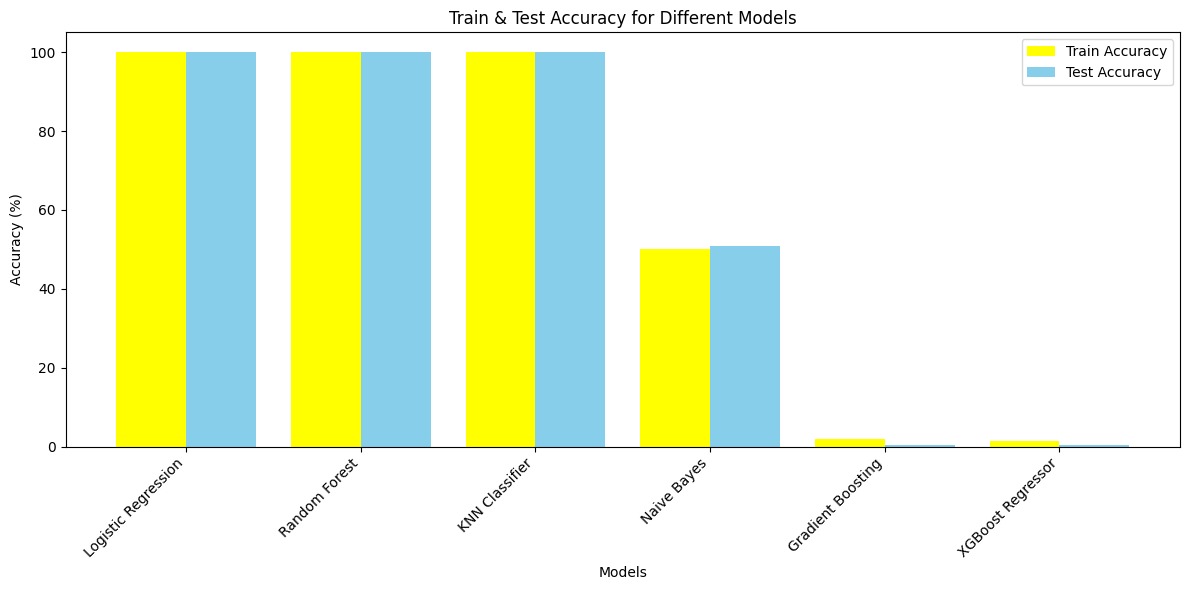

In [ ]:
models = ['Logistic Regression', 'Random Forest', 'KNN Classifier', 'Naive Bayes',
          'Gradient Boosting', 'XGBoost Regressor']

train_accuracy = [lgrg_train_score, rf_train_accuracy, knnC_train_score, gnb_train_score,
                  gbm_train_score, xgb_train_score]
test_accuracy = [lgrg_test_score, rf_test_accuracy, knnC_test_score, gnb_test_score,
                 gbm_test_score, xgb_test_score]

plt.figure(figsize=(12, 6))
x = range(len(models))
bar_width = 0.4

plt.bar([i - bar_width / 2 for i in x], train_accuracy, label='Train Accuracy',
        color='yellow', width=bar_width)
plt.bar([i + bar_width / 2 for i in x], test_accuracy, label='Test Accuracy',
        color='skyblue', width=bar_width)

plt.xticks(x, models, rotation=45, ha='right')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Train & Test Accuracy for Different Models')
plt.legend()

plt.tight_layout()
plt.show()

**ANN**

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential([
    Dense(200, input_dim=x_train.shape[1], activation='relu'),  # Input layer
    Dense(64, activation='relu'),                              # Hidden layer
    Dense(32, activation='relu'),                              # Additional hidden layer
    Dense(1, activation='linear')                              # Output layer for regression
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 200)                 │           8,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          12,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,577 (92.10 KB)

 Trainable params: 23,577 (92.10 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
history = model.fit(x_train, y_train, epochs=50, batch_size=64, validation_split=0.2, verbose=1)

Epoch 1/50
1003/1003 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 6.8178 - mae: 0.8095 - val_loss: 0.0231 - val_mae: 0.1118
Epoch 2/50
1003/1003 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0267 - mae: 0.1214 - val_loss: 0.0194 - val_mae: 0.1034
Epoch 3/50
1003/1003 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0354 - mae: 0.1370 - val_loss: 0.0228 - val_mae: 0.1023
Epoch 4/50
1003/1003 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0411 - mae: 0.1493 - val_loss: 0.0056 - val_mae: 0.0553
Epoch 5/50
1003/1003 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0323 - mae: 0.1035 - val_loss: 0.0024 - val_mae: 0.0349
Epoch 6/50
1003/1003 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0052 - mae: 0.0532 - val_loss: 0.0136 - val_mae: 0.1045
Epoch 7/50
1003/1003 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0199 - mae: 0.0993 - val_loss: 0.0015 - val_mae: 0.0262
Epoch 8/50
1003/1003 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0169 - mae: 0.0856 - val_loss: 0.0028 - val_mae: 0.0357
Epoch 9/50
1003/1003 ━━━━━━━━━━━━━━━━━━━

In [ ]:
loss, mae = model.evaluate(x_test, y_test, verbose=1)
print(f"Test Loss (MSE): {loss}")
print(f"Test Mean Absolute Error (MAE): {mae}")

627/627 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.2961e-04 - mae: 7.3880e-04
Test Loss (MSE): 0.00044869817793369293
Test Mean Absolute Error (MAE): 0.0008578949491493404


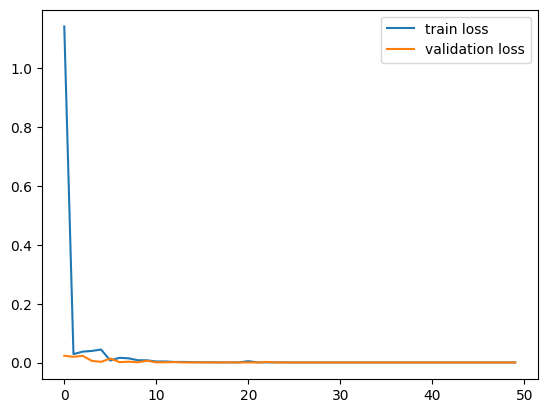

In [ ]:
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.legend()
plt.show()